### <h1 style='text-align:center'> Principle Component Analysis </h1> ###


The most broadly used <u>unsuperviced</u> algorithm is principle component analysis (PCA). It is fast and flexible.  

Fundamentally, PCA is a dimensionality reduction algorithm, but can also be used for visualization, noise filtering, and for feature extraction and engineering.  

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

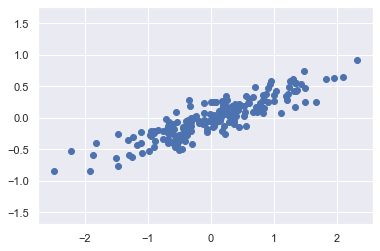

In [3]:
# consider these 200 points 

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Rather than predicting y from x, PCA attempts to learn the relationsihp between x and y by finding **principal axes** in the data. 

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


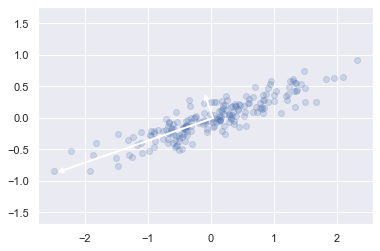

In [7]:
# let's visualize the vectors over the input data 
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### PCA for Visualization of Hand-Written Digits###

Looking at high-dimensional data, the usefulness of dimensionality reducton becomes clear. 

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

Data consists of 8x8 pixel images, or 64 dimensional. 

In [6]:
pca = PCA(2)  # project from 64 to 2 dimensions 

projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


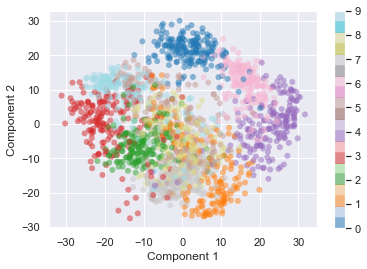

In [8]:
 #plot the first two principal components of each point to learn about the data

plt.scatter(projected[:, 0], projected[:, 1], 
            c=digits.target, edgecolor='none', alpha=0.5,
           cmap='tab20')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

**Choosing the Number of Components**

To detremine how many components are needed to describe the data, let's look at the cumulative explained variance ratio as a function of compeonents: 

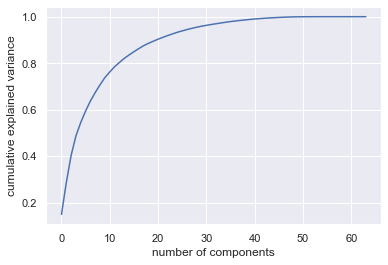

In [23]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N
 components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.